## DECISION TREE CLASSIFIER ON IRIS DATASET

In [1]:
from warnings import  filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df= pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## PREPROCESSING STEPS

In [8]:
X = df.drop(labels=['species'],axis=1)
Y = df[['species']]

In [9]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
Y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


## LABELENCODE THE TARGET FEATURES

In [11]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [12]:
Y['species']= Le.fit_transform(Y['species'])

In [13]:
Y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## BUILDING PIPELINE

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])

In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [18]:
cols= num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [19]:
X_pre= pd.DataFrame(X_pre,columns=cols)
X_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


## TRAIN TEST SPLIT 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest= train_test_split(X_pre,Y,test_size=0.33,random_state=21)

## BUILDING DECISION TRESS MODEL

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

## EVALUATION FOR TRAINING AND TESTING

In [24]:
dtc.score(xtrain,ytrain)

1.0

In [25]:
dtc.score(xtest,ytest)

0.94

## TUNE THE HYPERPARAMETER
1. max_depth
2. mini_samples_split
3. mini_samples_leaf
4. Criterian(gini,entropy)

In [33]:
params= {'max_depth':[2,3,4,5,6],
         'min_samples_split':[4,5,6,7,8],
         'criterion':['gini','entropy']}

## CROSS VALIDATION

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
model= DecisionTreeClassifier()
gscv=GridSearchCV(model,param_grid=params,cv=5,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [4, 5, 6, 7, 8]},
             scoring='f1_macro')

In [36]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 4}

In [37]:
gscv.best_score_

1.0

In [38]:
best_dtc= gscv.best_estimator_

In [39]:
best_dtc.score(xtrain,ytrain)

1.0

In [40]:
best_dtc.score(xtest,ytest)

0.94

## VISUALIZATION -> HOW THE TREE IS BUILD

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

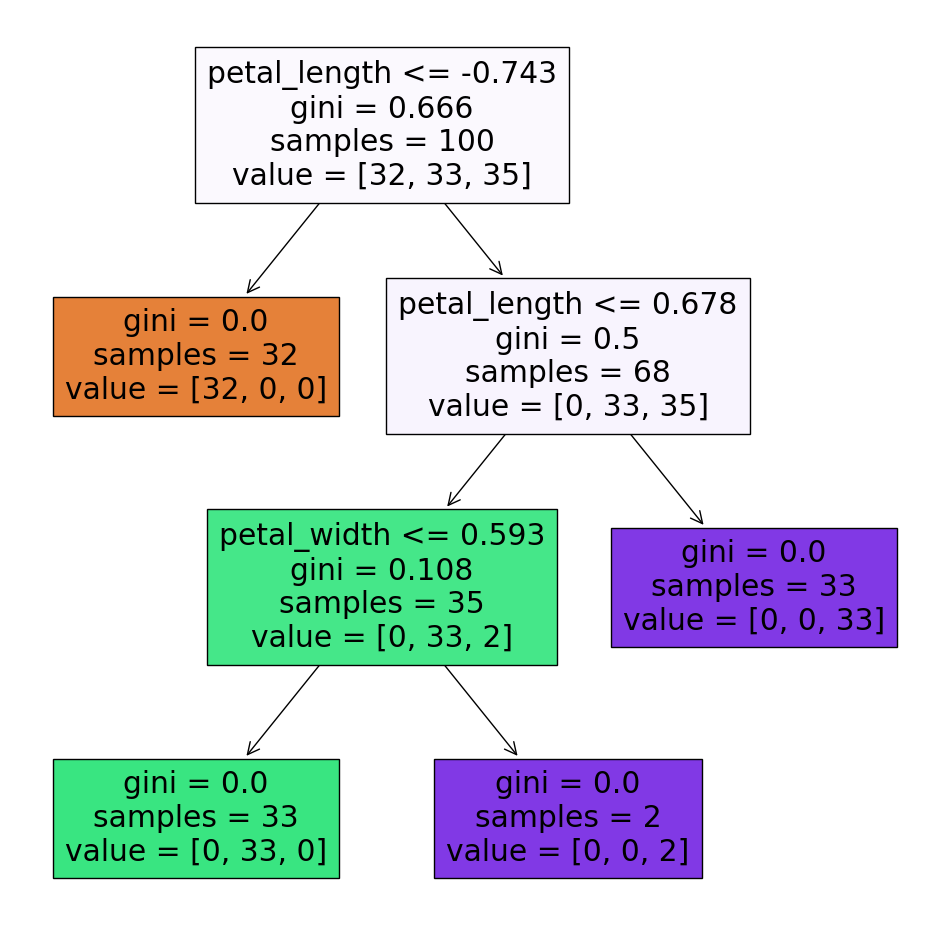

In [43]:
plt.figure(figsize=(12,12))
plot_tree(best_dtc,filled=True,feature_names=list(xtrain.columns))
plt.show()

## PREDICT THE DATA

In [45]:
ypred_tr= best_dtc.predict(xtrain)
ypred_ts= best_dtc.predict(xtest)

## EVALUATE THE BEST MODEL (PLOTING CONFUSION MATRIX)

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

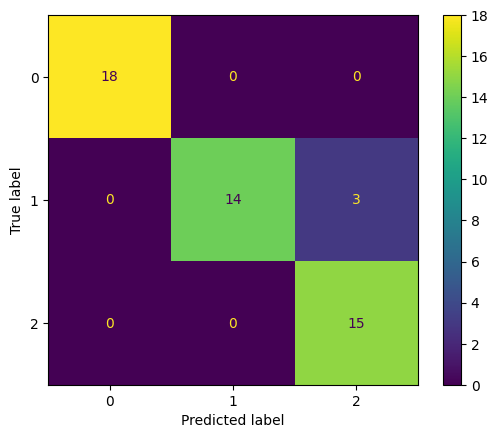

In [46]:
cf= confusion_matrix(ytest,ypred_ts)
cfd= ConfusionMatrixDisplay(cf,display_labels=best_dtc.classes_)
cfd.plot()

## CLASSIFICATION REPORT

In [47]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.82      0.90        17
           2       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



## GETTING ORIGINAL LABELS

In [50]:
ypred_tr_le= Le.inverse_transform(ypred_tr)
ypred_ts_le= Le.inverse_transform(ypred_ts)

In [51]:
ypred_tr_le

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'ver

In [52]:
ypred_ts_le

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa'], dtype=object)